<a href="https://colab.research.google.com/github/FJPO/citation_predictor/blob/main/Internship_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
from time import gmtime, strftime

In [37]:
data = pd.read_csv('predict.csv')
data = data.drop(['authors_mean_pagerank', 'authors_mean_productivity', 'journal_pagerank'], axis = 1)
data = data[~np.isnan(data).any(axis = 1)]

yScaler = preprocessing.MinMaxScaler()
y_train = yScaler.fit_transform(np.array(data['c5']).reshape(-1,1))

x_train = data.drop('c5', axis = 1)
for i, name in enumerate(x_train.columns):
  x_train[name] = preprocessing.MinMaxScaler().fit_transform(np.array(data[name]).reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size = 0.2, shuffle = True)

In [41]:
model = Sequential()
model.add(Dense(150, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = Adam(lr = 0.001), loss = 'mse')

log = model.fit(x_train, y_train, 16, 10, verbose=1, validation_split=0.2)

Epoch 1/10
5/5 [==============================] - 1s 47ms/step - loss: 0.0092 - val_loss: 0.0078
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 0.0040 - val_loss: 0.0073
Epoch 3/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0031 - val_loss: 0.0047
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 9.4213e-04 - val_loss: 0.0038
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 7.1685e-04 - val_loss: 0.0034
Epoch 7/10
5/5 [==============================] - 0s 13ms/step - loss: 6.2673e-04 - val_loss: 0.0034
Epoch 8/10
5/5 [==============================] - 0s 12ms/step - loss: 5.1703e-04 - val_loss: 0.0033
Epoch 9/10
5/5 [==============================] - 0s 13ms/step - loss: 3.9042e-04 - val_loss: 0.0032
Epoch 10/10
5/5 [==============================] - 0s 13ms/step - loss: 4.6964e-04 - val_loss: 0.0030


In [57]:
y_test_from_model = yScaler.inverse_transform(model.predict(x_test))
y_actual = yScaler.inverse_transform(y_test)
# for i in range(len(y_actual)):
#   print(int(y_test_from_model[i]) if (y_test_from_model[i] > 0) else 0, '\t', int(y_actual[i][0]))

diff = y_test_from_model - y_actual
err = np.mean(abs(diff))
print('На тестовом наборе результат в средем отклоняется на', int(err))

На тестовом наборе результат в средем отклоняется на 5


Enter description: Ошибка


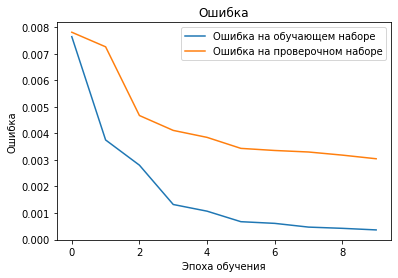

In [58]:
descr = input('Enter description: ')
if (descr == ''): descr = 'Plot'


plt.plot(log.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(log.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()

plt.title(descr)
plt.savefig(strftime("%Y-%m-%d %H:%M:%S", gmtime()) + '__' + descr + '.png')
plt.show()